В данной задаче 2 типа погрешностей:
1) Погрешность неустранимая, связаная с погрешностью dt ~ 10^-3
2) Погрешность метода -> разложение в ряд Маклорена

Погрешность неустранимую можно оценить как |u(b) - u(a)|, но чтобы вычислить значения функции в точке -> требуется разложить в ряд Маклорена, затем отсечь начинаю с n+1 члена и подставить нужню точку. Поэтому итоговая погрешность будет du = du1 + du2

Для определения погрешности метода воспользуемся разложением с остаточным членом в форме Лагранжа:
$|R_{n}| = |\frac{u^{(n + 1)}(\xi)}{(n + 1)!} \cdot t^{n+1}| <= \frac{M}{(n + 1)!} \cdot |t|^{n + 1}$, где $\xi \in [0, t]$ и $M = max|u^{(n + 1)}(\xi)|$.

Но по условию существует неустранимая погрешность аргумента. Поэтому общая погрешность
$\Delta_{общ} = \Delta_{метода} + \Delta_{неустр}$, safety_factor вводится так как:
$\Delta_{метода} = \Delta_{общ} - \Delta_{неустр}$ и величины справа одного порядка

In [30]:
import math

def find_min_n_sin(t_max, delta=1e-3, safety_factor = 0.1):
    """Для sin(t): M = 1 всегда"""
    n = 0
    while True:
        term = (t_max ** (n+1)) / math.factorial(n+1)
        if term <= delta * safety_factor:
            return n
        n += 1
def find_min_n_exp(t_max, delta=1e-3, safety_factor = 0.1):
    """Для e^t: M = e^t (наихудший случай)"""
    n = 0
    M = math.exp(t_max)  # Максимальное значение производной
    while True:
        term = M * (t_max ** (n+1)) / math.factorial(n+1)
        if term <= delta * safety_factor:
            return n
        n += 1
n1 = find_min_n_sin(t_max=1, delta=1e-3)
print(f"Для отрезка [0, 1] можно отбрасывать члены, начиная с n = {n1}")
n2 = find_min_n_exp(t_max=1, delta=1e-3)
print(f"Для отрезка [0, 1] можно отбрасывать члены, начиная с n = {n2}")

Для отрезка [0, 1] можно отбрасывать члены, начиная с n = 7
Для отрезка [0, 1] можно отбрасывать члены, начиная с n = 7


Видно что на отрезке [10, 11] требуется гораздо больше членов членов разложения чтобы добиться нужно точности. Также из графика(см. 1_8_19_errors) видно что метод не сходится.

Поэтому предлагается для sin(t) сдвинуть точку разложения в середину отрезка, то есть t_opt = (t_max - t_min) / 2 = 10.5
Тогда получаем следующую оценку для ошибки метода:
$|R_{n}| = |\frac{u^{(n + 1)}(\xi)}{(n + 1)!} \cdot (t - t_{opt})^{n+1}| <= \frac{M}{(n + 1)!} \cdot |t-t_{opt}|^{n + 1}$

In [32]:
def find_min_n_sin_optimal(t_max, delta=1e-3, safety_factor = 0.1):
    """Для sin(t): M = 1 всегда"""
    '''Рассматриваем отрезок [10, 11]'''
    n = 0
    while True:
        term = ((t_max - 10.5) ** (n+1)) / math.factorial(n+1)
        if term <= delta * safety_factor:
            return n
        n += 1
def find_min_n_sin(t_max, delta=1e-3, safety_factor = 0.1):
    """Для sin(t): M = 1 всегда"""
    n = 0
    while True:
        term = (t_max ** (n+1)) / math.factorial(n+1)
        if term <= delta * safety_factor:
            return n
        n += 1
n_1 = find_min_n_sin_optimal(11, delta=1e-3)
n_2 = find_min_n_sin(11, delta=1e-3)
print(f"Для отрезка [10, 11] можно отбрасывать члены, начиная с n = {n_1}")
print(f"Для отрезка [10, 11] можно отбрасывать члены, начиная с n = {n_2}")

Для отрезка [10, 11] можно отбрасывать члены, начиная с n = 5
Для отрезка [10, 11] можно отбрасывать члены, начиная с n = 35


То есть метод сходится в оптимальном случае для синуса

In [8]:
def find_min_n_exp(t_max, delta=1e-3, safety_factor = 0.1):
    """Для e^t: M = e^t (наихудший случай)"""
    n = 0
    M = math.exp(t_max)  # Максимальное значение производной
    while True:
        term = M * (t_max ** (n+1)) / math.factorial(n+1)
        if term <= delta * safety_factor:
            return n
        n += 1
def find_min_n_exp_optimal(t_max, delta=1e-3, safety_factor = 0.1):
    """Для e^t: M = e^t (наихудший случай)"""
    n = 0
    t_opt = 10.5
    M = math.exp(t_max)  # Максимальное значение производной
    while True:
        term = M * ((t_max - t_opt) ** (n+1)) / math.factorial(n+1)
        if term <= delta * safety_factor:
            return n
        n += 1
n_1 = find_min_n_exp_optimal(11, delta=1e-3)
n_2 = find_min_n_exp(11, delta=1e-3)
print(f"Для отрезка [10, 11] можно отбрасывать члены, начиная с n = {n_1}")
print(f"Для отрезка [10, 11] можно отбрасывать члены, начиная с n = {n_2}")

Для отрезка [10, 11] можно отбрасывать члены, начиная с n = 9
Для отрезка [10, 11] можно отбрасывать члены, начиная с n = 44


Для предложенного метода видно, что n сильно отличаются в меньшую сторону

Построим график зависимости номера, начиная с которого можно отрбрасывать члены от safety_factor 

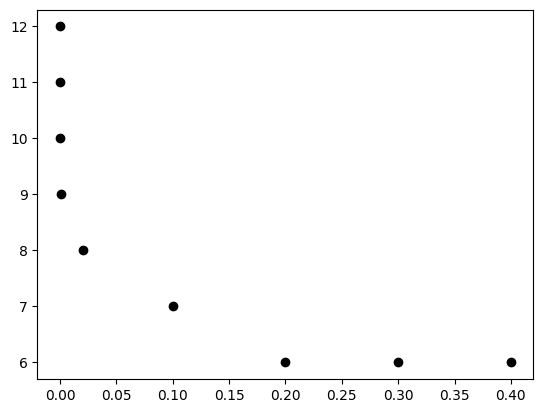

In [5]:
import matplotlib.pyplot as plt
def find_min_n_sin(t_max, delta=1e-3, safety_factor = 0.1):
    """Для sin(t): M = 1 всегда"""
    n = 0
    while True:
        term = (t_max ** (n+1)) / math.factorial(n+1)
        if term <= delta * safety_factor:
            return n
        n += 1
num_safety_factor = [10**-1, 2 * 10**-1, 3 * 10**-1, 4 * 10**-1, 2 * 10**-2, 10**-3, 10**-4, 10**-5, 10**-6]
n = []
for i in range(9):
    n.append(find_min_n_sin(t_max=1, delta=1e-3, safety_factor=num_safety_factor[i]))
plt.scatter(num_safety_factor, n, color='black', marker='o')
plt.show()